# 随机梯度下降
在深度学习中，目标函数通常是训练数据集中每个样本的损失函数的平均值，给定n个样本的训练集，如果使用梯度下降法的话，则每个自标量迭代的计算代价为O（n），随n线性增长，当训练数据集较大的时候，每次迭代的梯度下降计算代价很高。

使用sgd就可以降低每次迭代时的计算代价，在随机梯度下降的每次迭代中，我们对数据随机采样一个样本，使用样本的梯度来更新网络参数，从而使计算代价降低为O（1）

此外，随机梯度是对完整体度的无偏估计，这意味着平均而言，随机梯度是对梯度的良好估计


epoch 50, x1: 0.229104, x2: 0.192418


D:\devloper\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


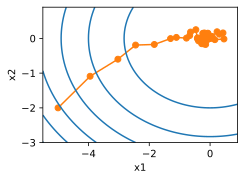

In [1]:
from pltutils import show_trace_2d,train_2d
import torch as t

# 将随机梯度下降和梯度下降相比较
def f(x1,x2):
    return x1**2+2*x2**2
def f_grad(x1,x2):
    return 2*x1,4*x2

def sgd(x1,x2,s1,s2,f_grad):
    g1,g2=f_grad(x1,x2)

    g1+=t.normal(0.,1,(1,))
    g2+=t.normal(0.,1,(1,))
    eta_t=eta*lr()
    return (x1-eta_t*g1,x2-eta_t*g2,0,0)

def constant_lr():
    return 1
eta=0.1
lr =constant_lr
show_trace_2d(f,train_2d(sgd,steps=50,f_grad=f_grad))

可以看到我们在随机梯度下降中的效果不如梯度下降[(代码在此)](gradientDescent.ipynb)平滑，这正是因为梯度的随机性质造成的。

即使我们接近了最小值，我们还是受到了噪声的影响，最后的结果并不是非常理想，经过额外的步骤它还是变差了，我们只能够选择不同的eta来解决上述问题，那么又要动态地调整学习率了。

epoch 500, x1: -0.265811, x2: -0.117936


D:\devloper\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


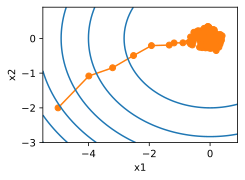

In [2]:
import math
def exponetial_lr():
    global t1
    t1+=1
    return math.exp(-0.1,t1)

t1=1
lr=exponetial_lr
show_trace_2d(f,train_2d(sgd,steps=500,f_grad=f_grad))

epoch 50, x1: -0.080280, x2: -0.086571


D:\devloper\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


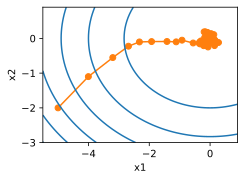

In [3]:
#使用多项式衰减
def polynominal_lr():
    global t1
    t1+=1
    return (1+0.1*t1)**(-0.5)

t1=1
lr =polynominal_lr
show_trace_2d(f,train_2d(sgd,steps=50,f_grad=f_grad))